In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

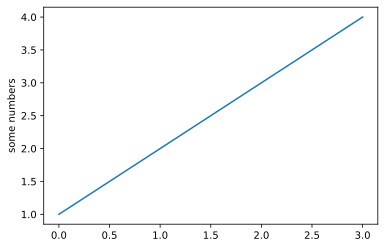

In [2]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

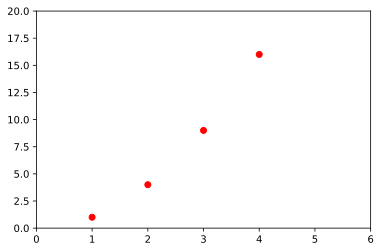

In [6]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro') # The default format string is 'b-', which is a solid blue line
plt.axis([0, 6, 0, 20]) # plt.axis([xmin, xmax, ymin, ymax])
plt.show()

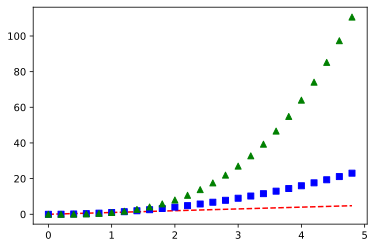

In [13]:
import numpy as np

'''
fmt = '[marker][line][color]', Other combinations such as ``[color][marker][line]`` are also supported, 
but note that their parsing may be ambiguous.
'''

t = np.arange(0., 5., 0.2)

plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^') 
plt.show()

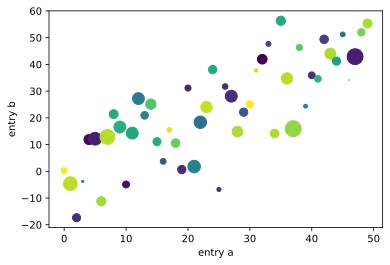

In [14]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data) # in scatter plots, color/size can be set by column
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

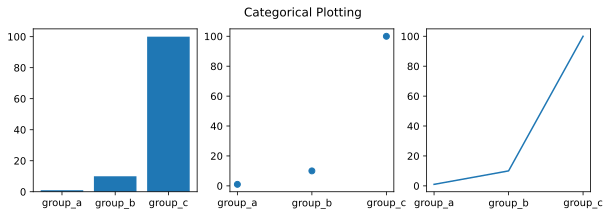

In [19]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
plt.bar(names, values)
plt.subplot(1, 3, 2)
plt.scatter(names, values)
plt.subplot(1, 3, 3)
plt.plot(names, values)

plt.suptitle('Categorical Plotting')
plt.show()

### Controlling line properties

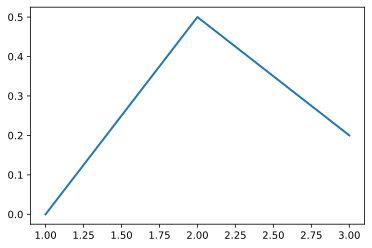

In [21]:
plt.plot([1, 2, 3], [0, 0.5, 0.2], linewidth=2);

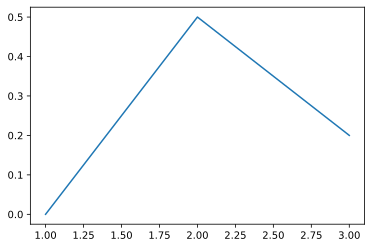

In [24]:
line, = plt.plot([1, 2, 3], [0, 0.5, 0.2], '-')
line.set_antialiased(False) # # turn off antialiasing
plt.show()

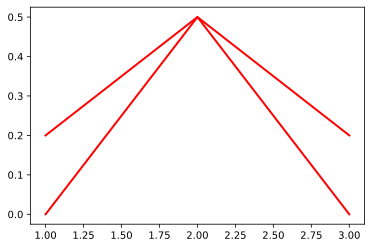

In [29]:
lines = plt.plot([1, 2, 3], [0, 0.5, 0.2], [3, 2, 1], [0, 0.5, 0.2])
plt.setp(lines, color='r', linewidth=2.0)
plt.show()

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
  markeredgecolor or mec:

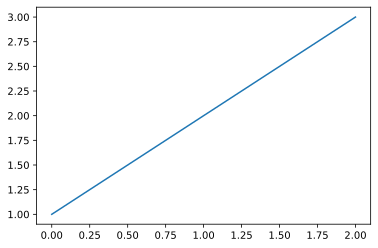

In [30]:
lines = plt.plot([1, 2, 3])
plt.setp(lines)

### Working with multiple figures and axes

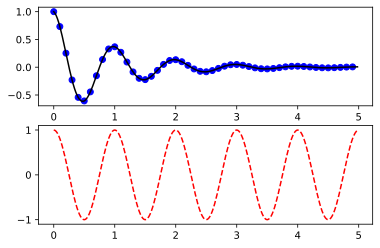

In [35]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(figsize=(6, 4)) # figure call here is optional
plt.subplot(211) # subplot(2, 1, 1) is identical to subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

Text(0.5, 1.0, 'Easy as 1, 2, 3')

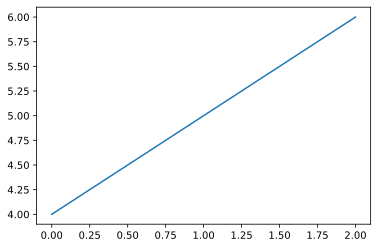

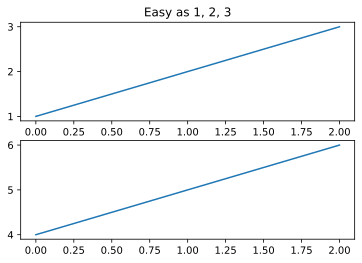

In [46]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot() by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

In [51]:
plt.clf()
plt.cla()
plt.close('all')

### Working with text

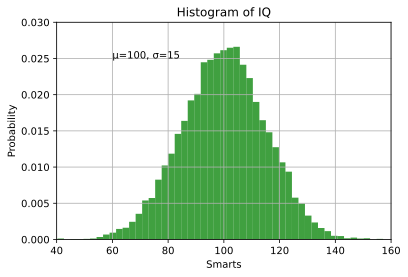

In [57]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
# plt.text(60, 0.025, r'$\mu=100, \ \sigma=15$')
plt.text(60, .025, '\u03BC=100, \u03C3=15')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

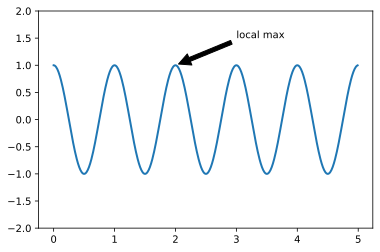

In [63]:
ax = plt.subplot()

t = np.arange(0, 5, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylim(-2, 2)
plt.show()

### Logarithmic and other nonlinear axes

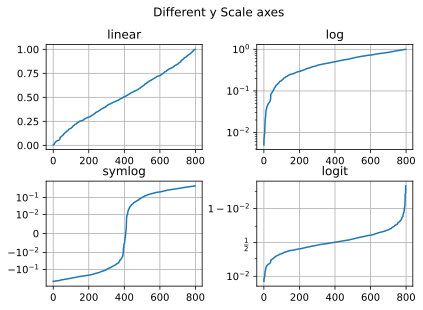

In [80]:
# Fixing random state for reproducibility
np.random.seed(19680801)

y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y>0) & (y<1)]
y.sort()
x = np.arange(len(y))

plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')

grid_title_dict = {'linear': 1, 'log': 2, 'symlog': 3, 'logit': 4}

for i, j in grid_title_dict.items():
    plt.subplot(2, 2, j)
    plt.title(i)
    plt.grid(True)
    
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.08, top=0.92, hspace=0.3, wspace=0.35)
plt.suptitle('Different y Scale axes', y=1.05)
    
plt.show()